In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-dataset-tarik-a-rashid/Medicaldataset.csv


In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [43]:

data = pd.read_csv('/kaggle/input/heart-attack-dataset-tarik-a-rashid/Medicaldataset.csv')
print(data)

      Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin    Result  
0                           83        160.0   1.80     0.012  negative  
1                           46        296.0   6.75     1.060  positive  
2                           77        270.0   1.99     0.003  negative  
3          

In [46]:
print(data.columns.tolist())


['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Προσοχή στο κεφαλαίο "G"
data.head()



,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [50]:
# Καθαρίζουμε τα ονόματα των στηλών
data.columns = data.columns.str.strip().str.lower()

# Τώρα μπορείς να κάνεις:
data['gender'] = le.fit_transform(data['gender'])


In [53]:
print(data.columns)



Index(['age', 'gender', 'heart rate', 'systolic blood pressure',
       'diastolic blood pressure', 'blood sugar', 'ck-mb', 'troponin',
       'result'],
      dtype='object')


In [54]:
# Χρήση σωστής στήλης στόχου
X = data.drop(['result'], axis=1)  # Χρησιμοποίησε το ακριβές όνομα της στήλης
y = data['result']

# Διαχωρισμός σε training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Αντικατάσταση τυχόν κενών τιμών με τον μέσο όρο
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Εκπαίδευση μοντέλου δέντρου απόφασης
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

# Χρήση σωστής στήλης στόχου
X = data.drop(['result'], axis=1)
y = data['result']

# Διαχωρισμός σε training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Αντικατάσταση τυχόν κενών τιμών με τον μέσο όρο
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Εκπαίδευση μοντέλου δέντρου απόφασης
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [56]:
from sklearn.metrics import accuracy_score

# Προβλέψεις για τα δεδομένα δοκιμής
y_pred = dt.predict(X_test)

# Υπολογισμός ακρίβειας
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.73%


In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")


Logistic Regression Accuracy: 79.55%


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Accuracy: 98.11%


In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")


KNN Accuracy: 64.39%


In [62]:
from sklearn.model_selection import GridSearchCV

# Ορισμός παραμέτρων προς έλεγχο
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Best Random Forest Accuracy: {accuracy_best_rf * 100:.2f}%")


Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Accuracy: 97.73%


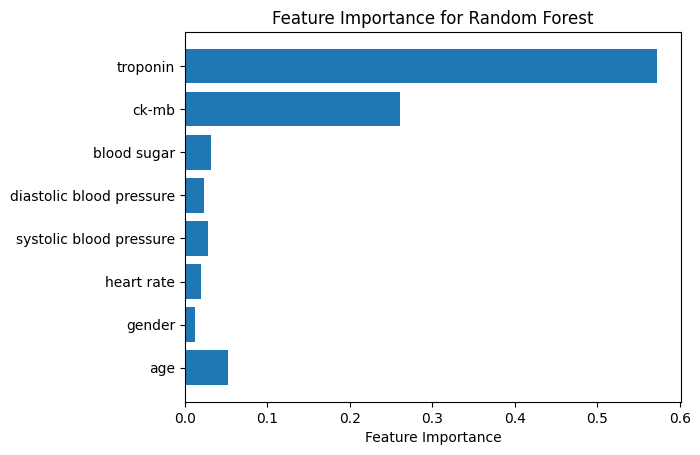

In [63]:
import matplotlib.pyplot as plt

# Σημαντικότητα χαρακτηριστικών από το Random Forest
feature_importances = rf.feature_importances_

# Σχεδίαση
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.show()


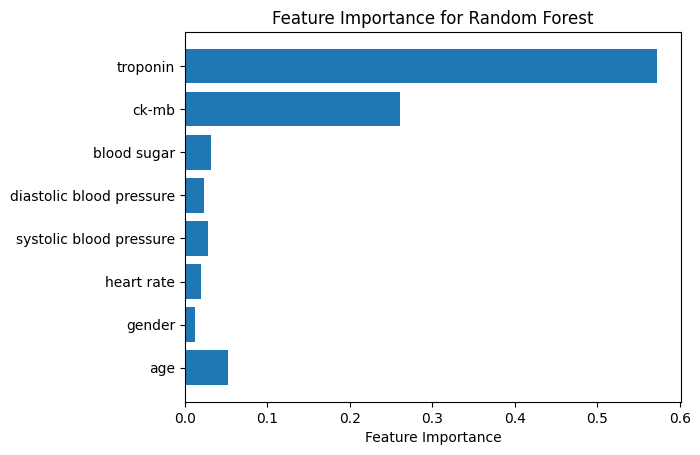

In [64]:
import matplotlib.pyplot as plt

# Σημαντικότητα χαρακτηριστικών από το Random Forest
feature_importances = rf.feature_importances_

# Σχεδίαση
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest')
plt.show()


In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Εκπαίδευση με κανονικοποιημένα δεδομένα
dt.fit(X_train_scaled, y_train)
y_pred_scaled = dt.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with Scaling: {accuracy_scaled * 100:.2f}%")


Accuracy with Scaling: 97.73%


In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Εκπαίδευση με κανονικοποιημένα δεδομένα
dt.fit(X_train_scaled, y_train)
y_pred_scaled = dt.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with Min-Max Scaling: {accuracy_scaled * 100:.2f}%")


Accuracy with Min-Max Scaling: 97.35%


In [67]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(dt, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean() * 100:.2f}%")


Cross-validation scores: [0.97348485 0.99242424 0.98863636 0.98484848 0.98479087]
Average CV score: 98.48%


In [68]:
data_cleaned = data.dropna()  # Αφαίρεση γραμμών με κενές τιμές


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


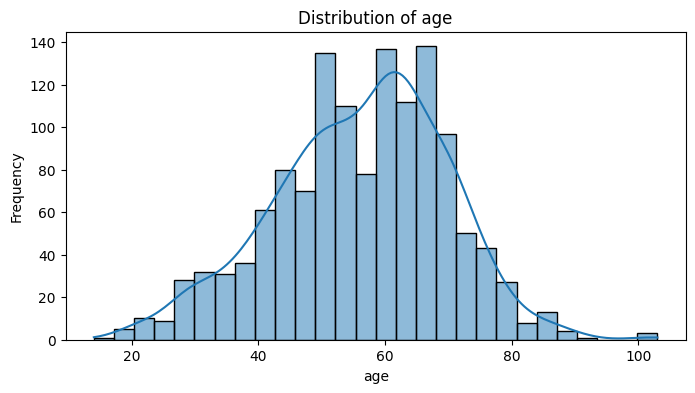

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


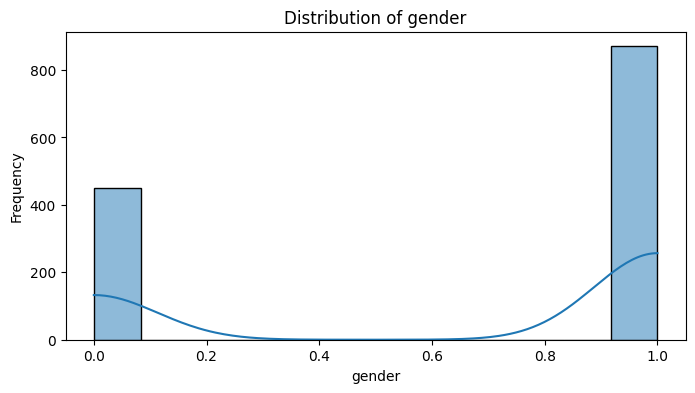

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


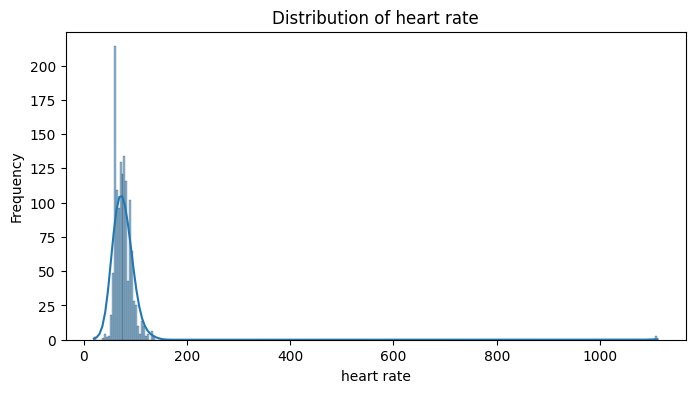

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


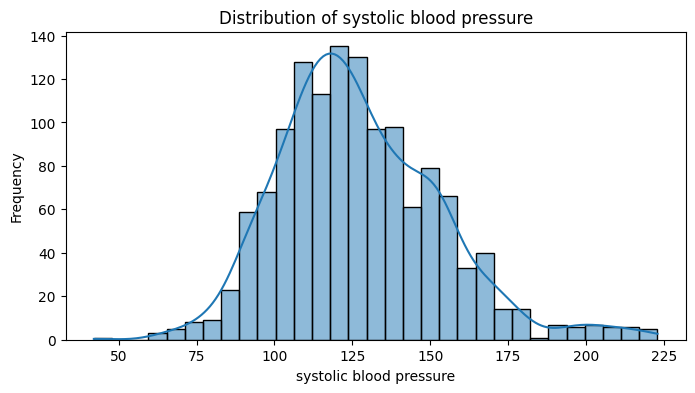

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


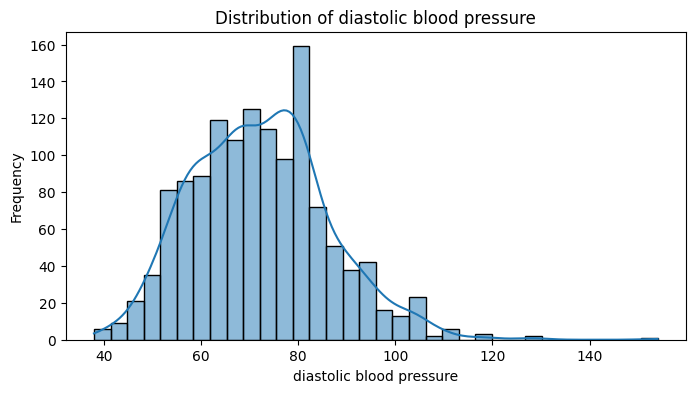

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


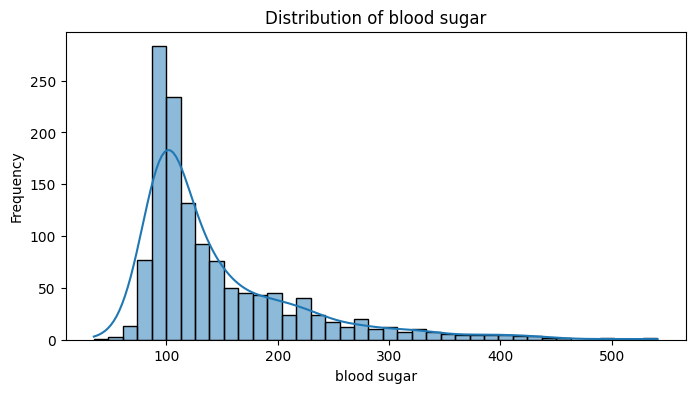

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


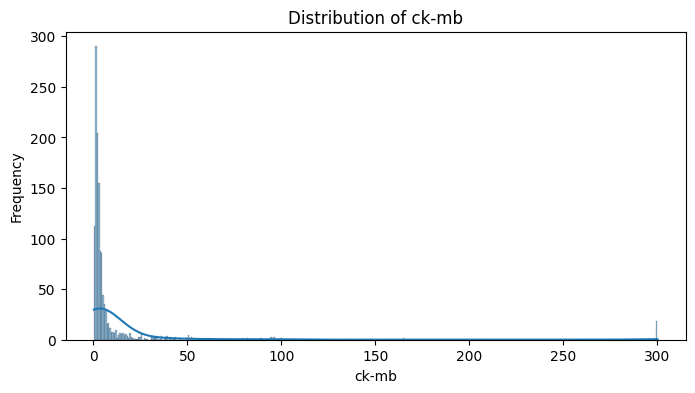

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


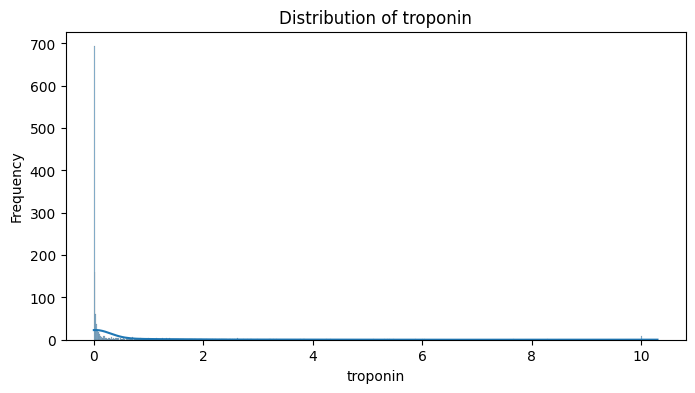

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


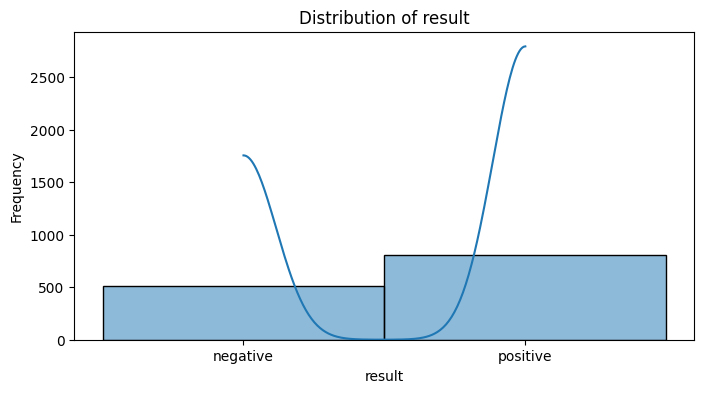

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Δημιουργία διαγραμμάτων κατανομής για κάθε χαρακτηριστικό
data_columns = data.columns
for column in data_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

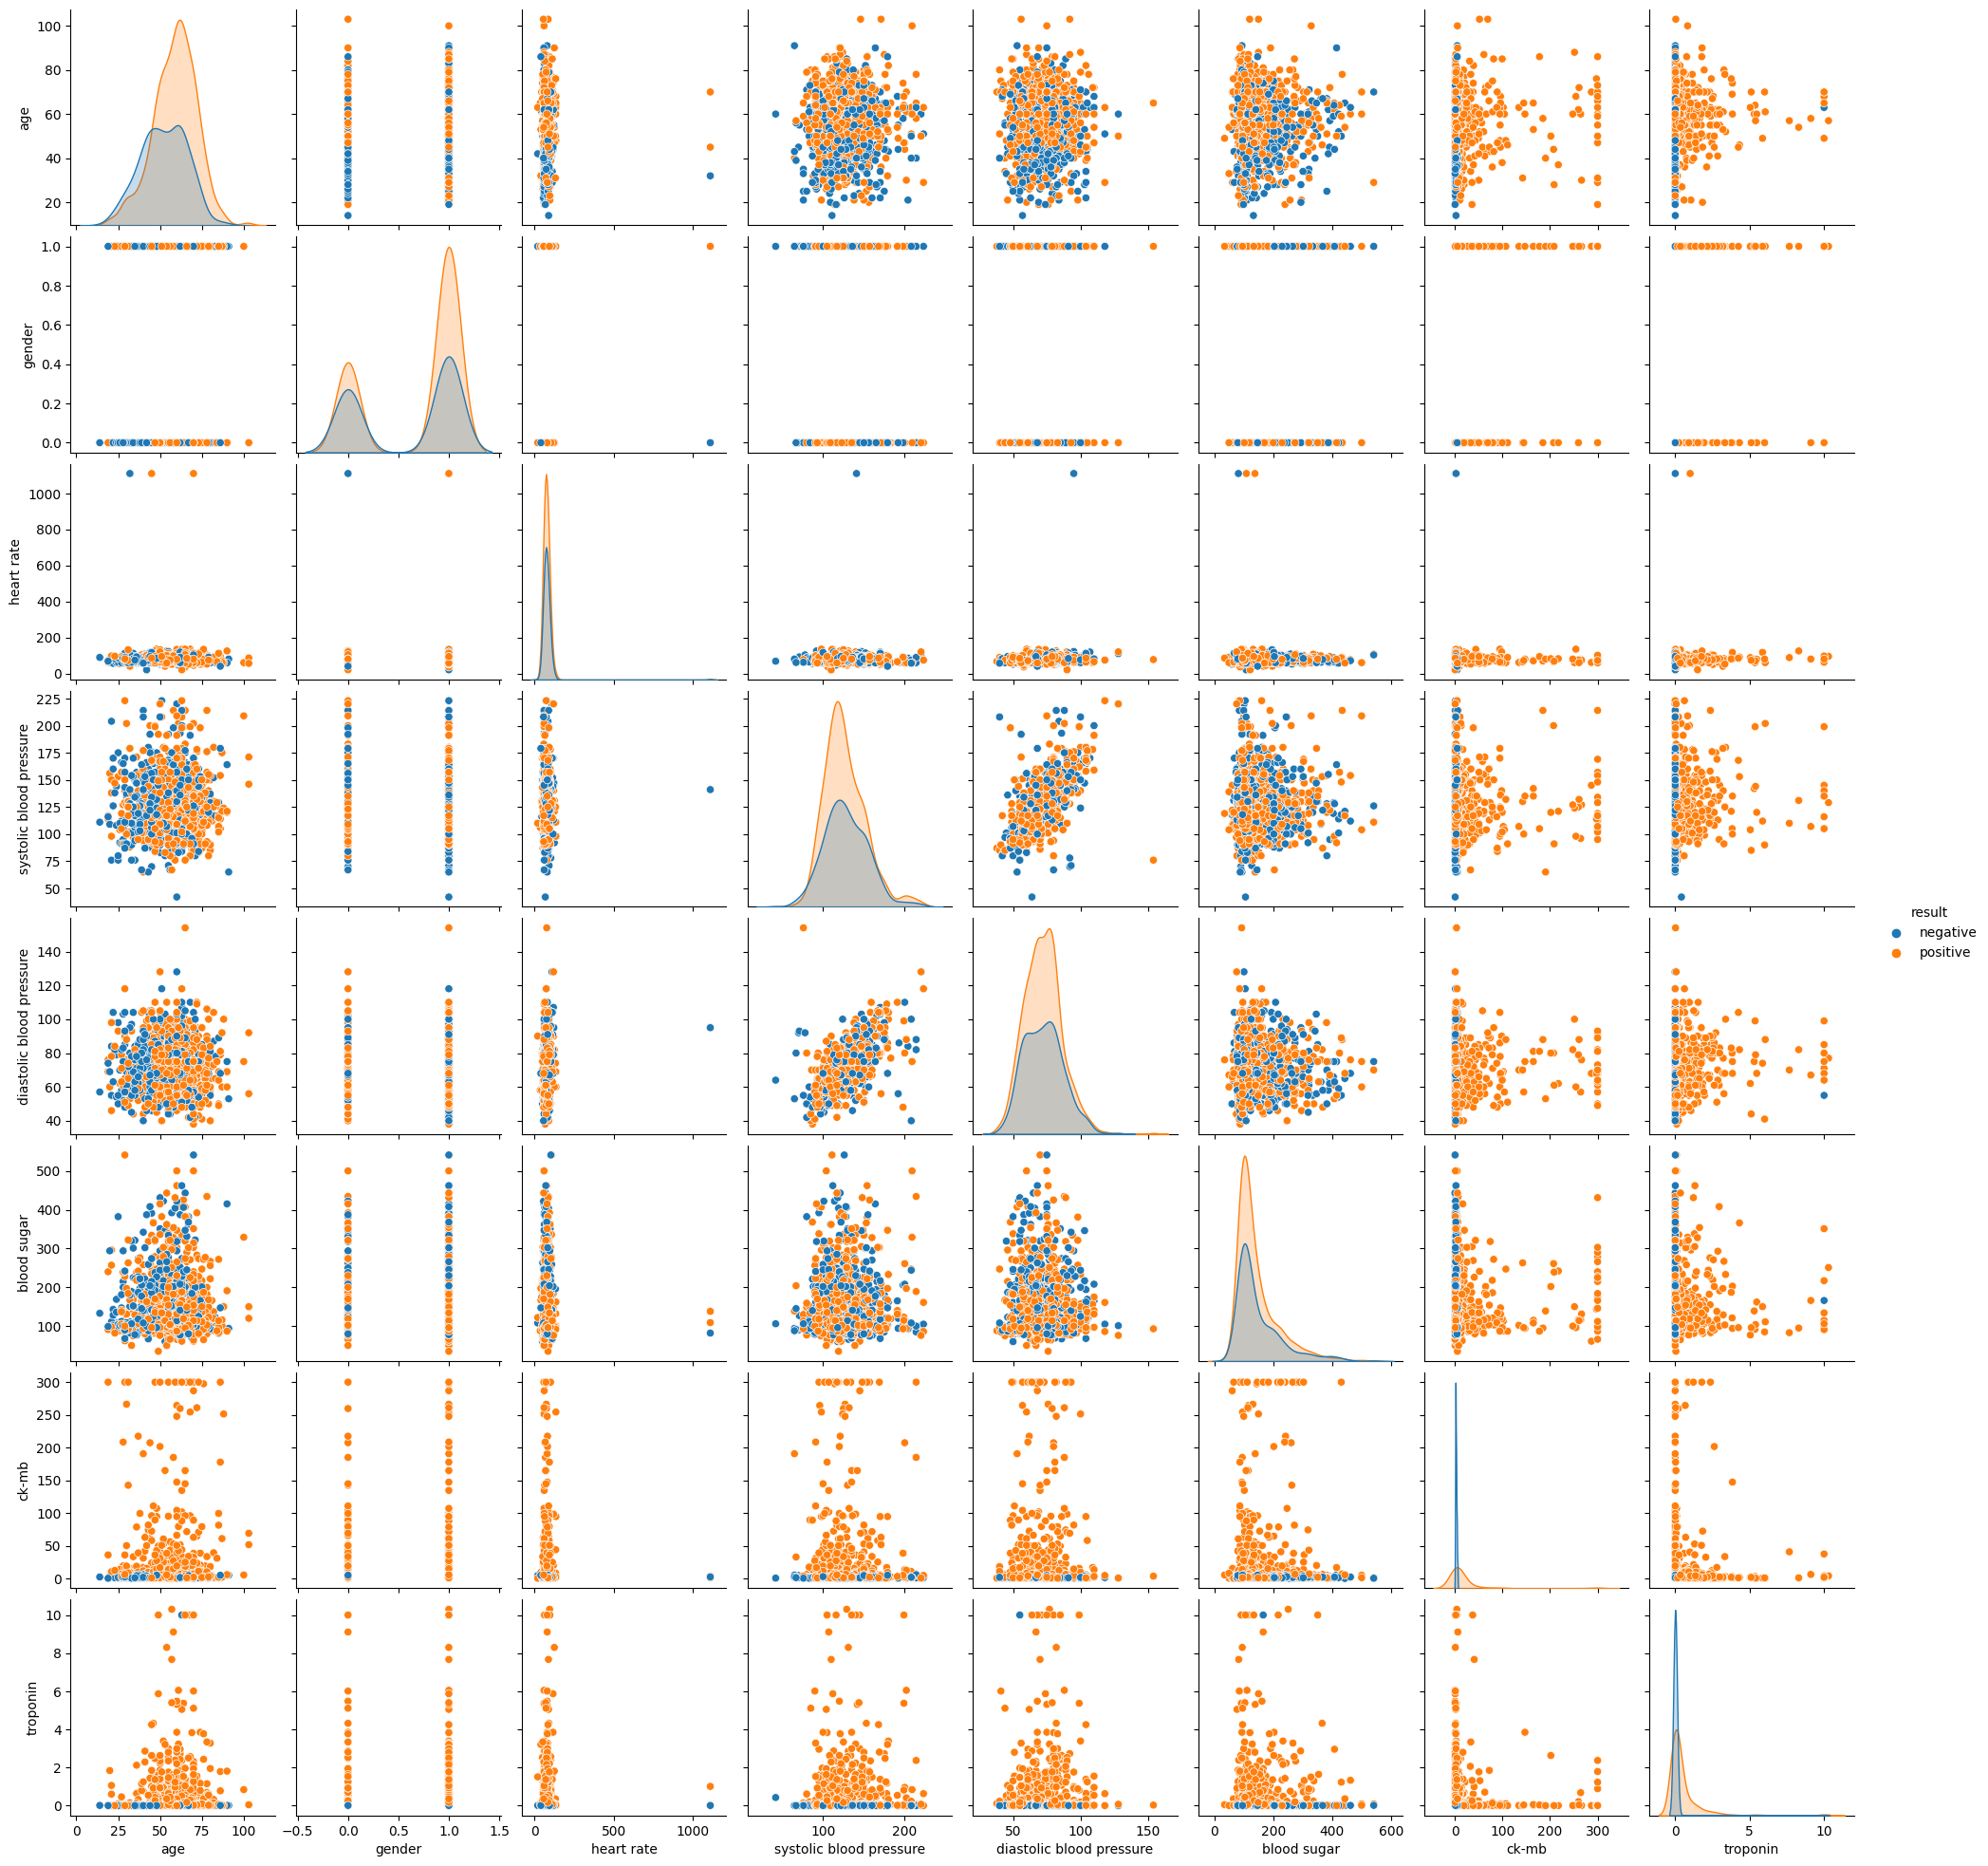

In [70]:
# Δημιουργία pairplot (διαγράμματα σχέσης μεταξύ όλων των χαρακτηριστικών)
sns.pairplot(data, hue='result')  # Αν η στήλη 'result' είναι η κατηγορία μας
plt.show()


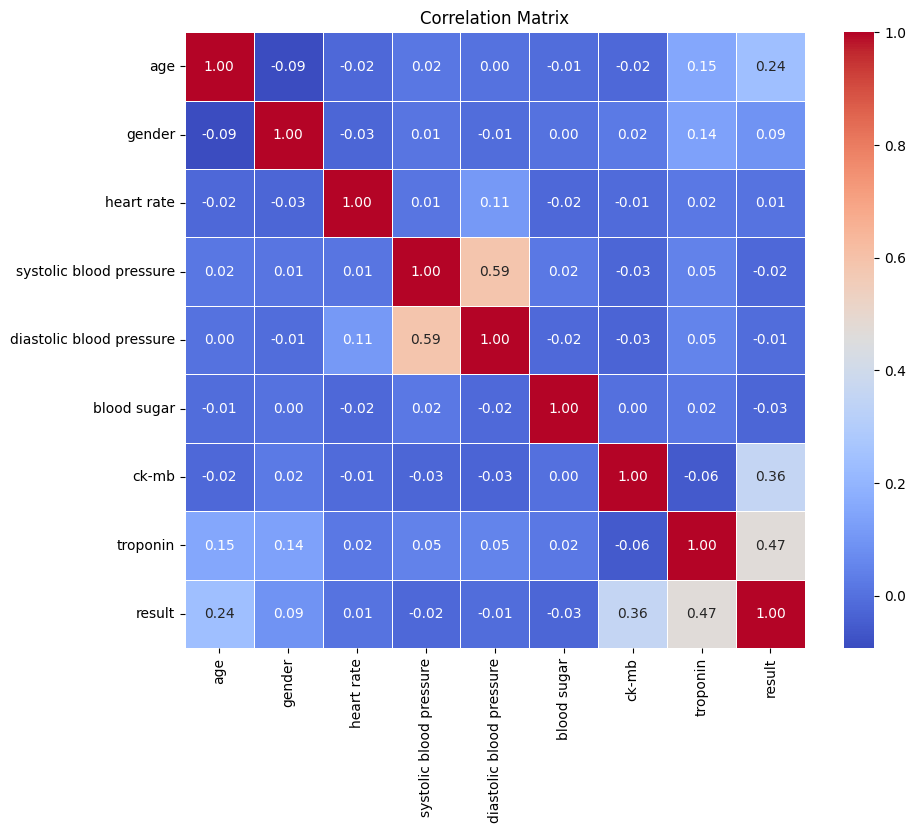

In [75]:
# Εξασφαλίζουμε ότι όλες οι κατηγορικές στήλες είναι αριθμητικές
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Εδώ φροντίζουμε να εφαρμόσουμε τον LabelEncoder στις κατηγορικές στήλες
categorical_columns = ['gender', 'blood sugar', 'ck-mb', 'troponin', 'result']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Υπολογισμός της μήτρας συσχέτισης
correlation_matrix = data.corr()

# Δημιουργία heatmap για να δούμε τη συσχέτιση
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


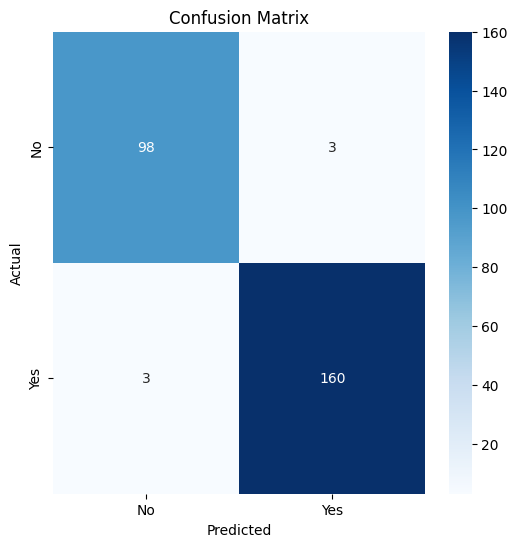

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Υπολογισμός confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Σχεδίαση του confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


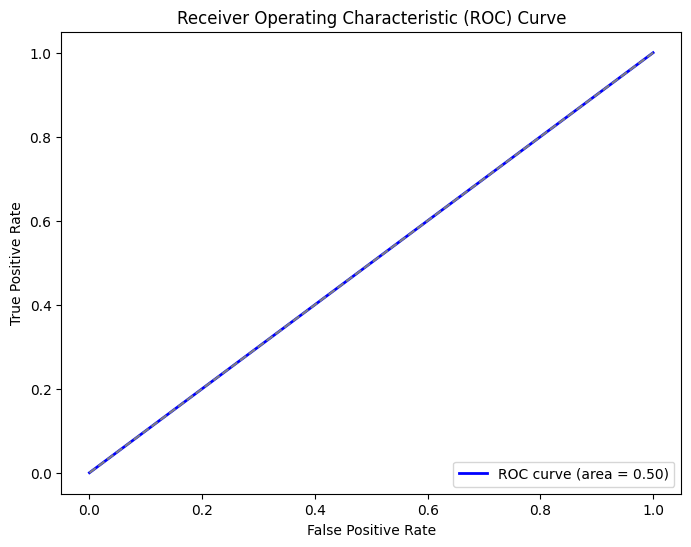

In [77]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Μετατροπή των κατηγορικών τιμών σε αριθμητικές
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)

# Υπολογισμός ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_numeric, dt.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Σχεδίαση ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Χωρίς πληροφορίες (τυχαία ταξινόμηση)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



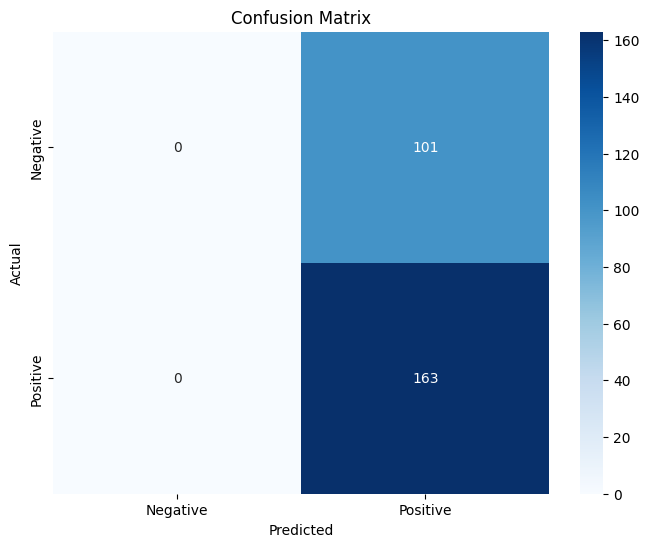

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Υπολογισμός της μητρώας σύγχυσης
cm = confusion_matrix(y_test, dt.predict(X_test))

# Δημιουργία heatmap της μητρώας σύγχυσης
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


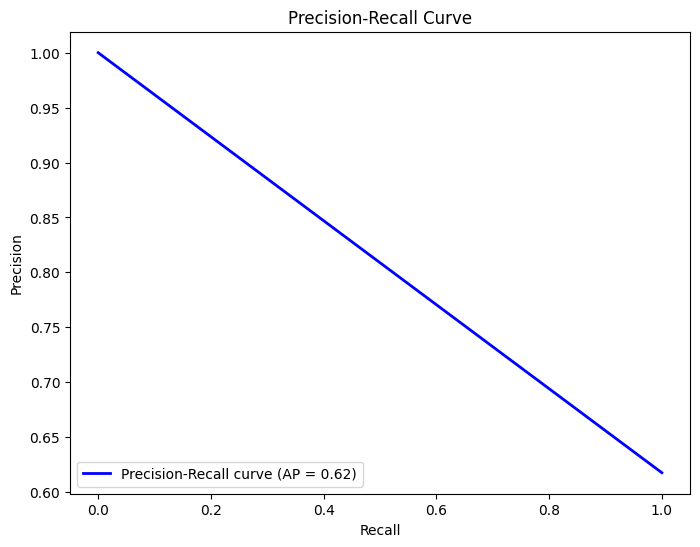

In [80]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Υπολογισμός Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_numeric, dt.predict_proba(X_test)[:, 1])
average_precision = average_precision_score(y_test_numeric, dt.predict_proba(X_test)[:, 1])

# Σχεδίαση Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


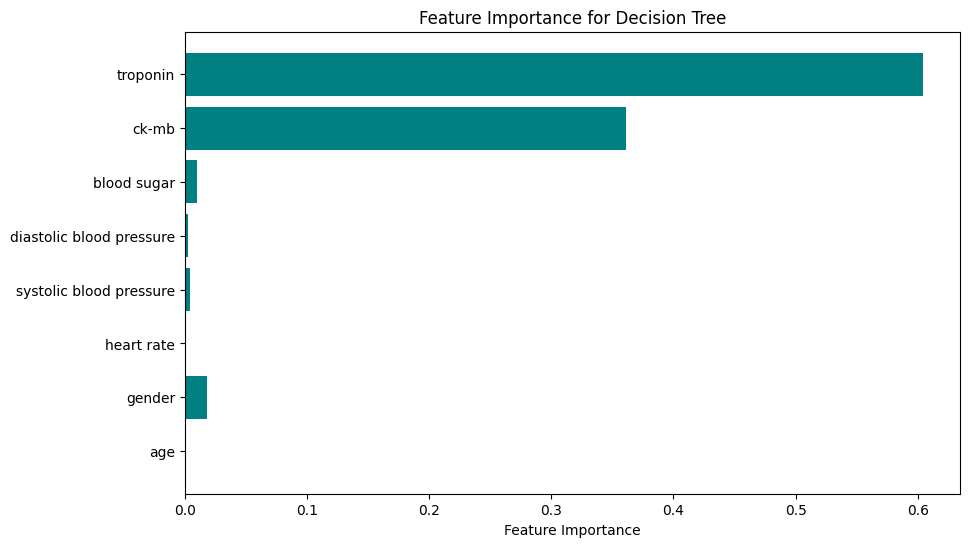

In [81]:
# Σημασία Χαρακτηριστικών
feature_importances = dt.feature_importances_

# Δημιουργία γραφήματος για τη σημασία των χαρακτηριστικών
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='teal')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Decision Tree')
plt.show()


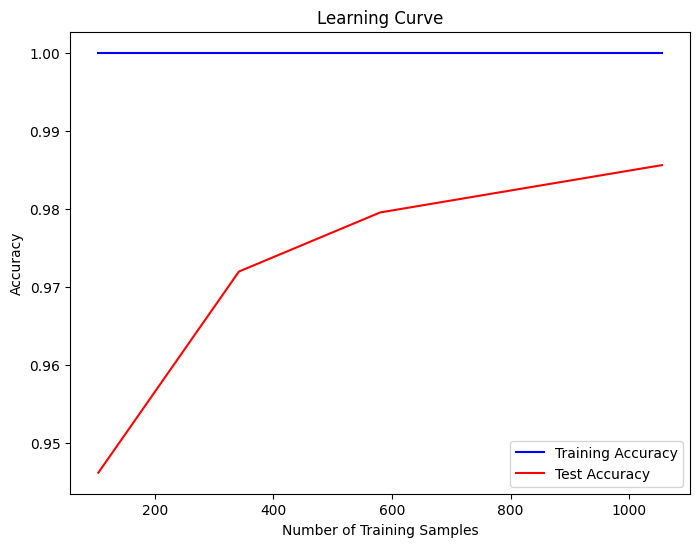

In [82]:
from sklearn.model_selection import learning_curve

# Υπολογισμός learning curve
train_sizes, train_scores, test_scores = learning_curve(dt, X, y, cv=5, scoring='accuracy')

# Μέσος όρος και διάστημα για τα αποτελέσματα
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Δημιουργία learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [83]:
from sklearn.model_selection import cross_val_score

# Cross-validation για το μοντέλο
cv_scores = cross_val_score(dt, X, y, cv=10, scoring='accuracy')

# Εμφάνιση των αποτελεσμάτων του cross-validation
print("Cross-validated Accuracy: ", cv_scores.mean())


Cross-validated Accuracy:  0.9855887115429101
